# SEABORN
Statistical plotting library  
Built on Matpolotlib


# Distribution Plots

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True

In [5]:
# Read data set
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


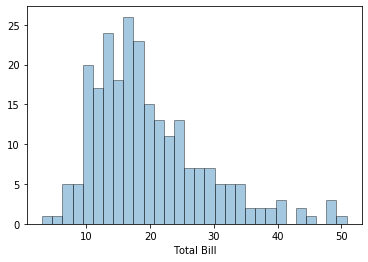

In [6]:
# Create histogram to visualize distribution for univariate data
sns.distplot(tips['total_bill'],kde = False, bins = 30, axlabel = 'Total Bill') # removes kernal density estimation 

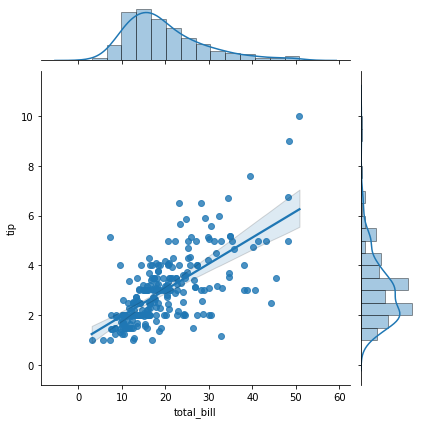

In [7]:
# Create joint plot to visualize bivariate data
sns.jointplot(x ='total_bill' ,y='tip' , data = tips, kind = 'reg')

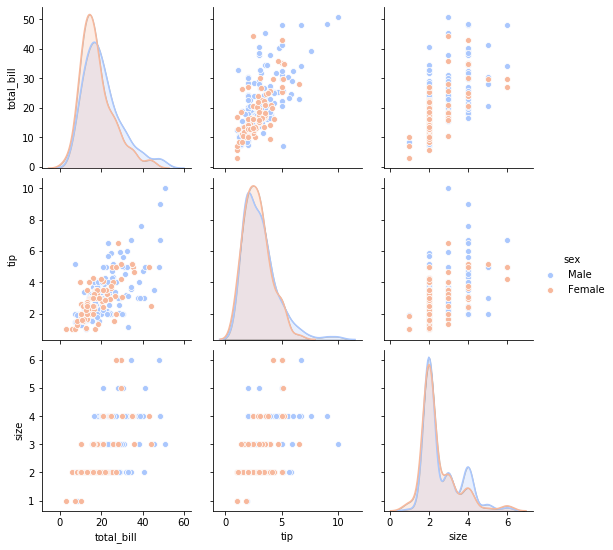

In [8]:
# Create pairplot to cresate joint plot for every combo of numerical columns in the dataframe
sns.pairplot(tips, hue = 'sex', palette= 'coolwarm')  # pass a categorical column to hue

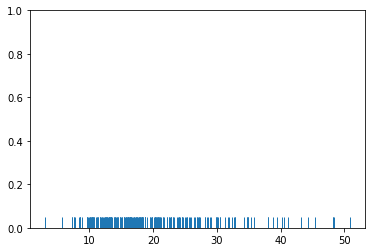

In [9]:
# Create rug plot 
sns.rugplot(tips['total_bill'])

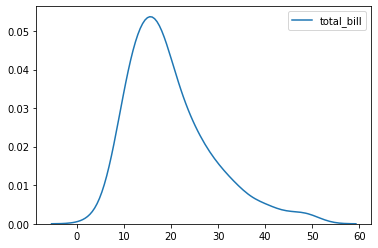

In [10]:
# Create kde plot
sns.kdeplot(tips['total_bill'])

# Categorical Plots

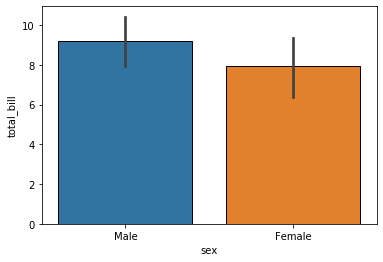

In [11]:
# Create bar plot
import numpy as np
sns.barplot(x ='sex' ,y = 'total_bill',data = tips, estimator = np.std) #default is mean

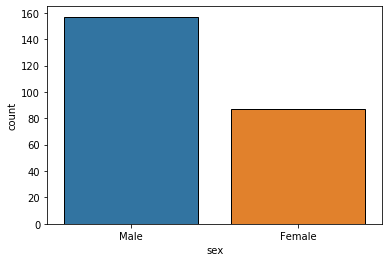

In [12]:
# Create count plot
sns.countplot(x= 'sex', data = tips) # same as bar plot except y axis already chosen

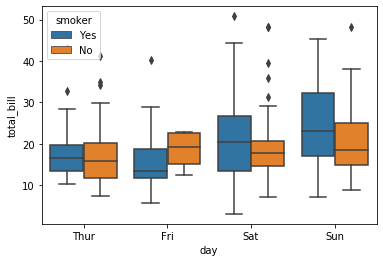

In [13]:
# Create box plot 
sns.boxplot(x = 'day', y = 'total_bill', data = tips, hue = 'smoker') # x is categorical, y is numerical

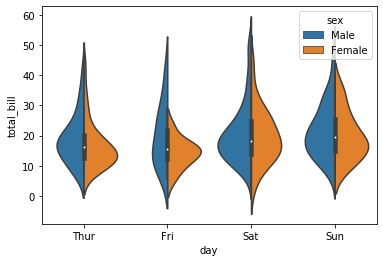

In [14]:
# Create violin plot
sns.violinplot(x = 'day', y = 'total_bill', data = tips, hue = 'sex', split = True)

C:\Users\admin\Anaconda3\envs\training\lib\site-packages\seaborn\categorical.py:2784: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


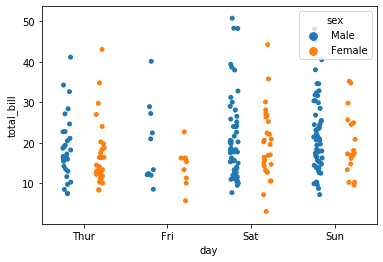

In [15]:
# Strip plot 
sns.stripplot(x = 'day', y = 'total_bill', data= tips, jitter = True, hue = 'sex', split = True) # similiar to scatter plot but one variable is categorical

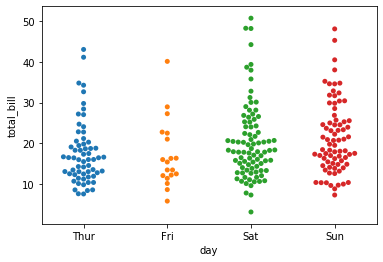

In [16]:
# Create swarmplot
sns.swarmplot(x = 'day', y = 'total_bill', data = tips) # combo of violin plot and stripplot but the points don't overlap

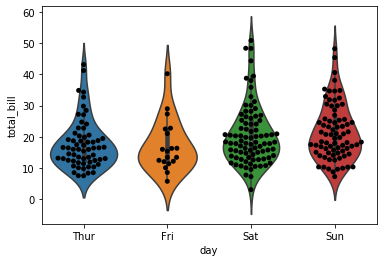

In [17]:
# Create swarmplot
sns.violinplot(x = 'day', y = 'total_bill', data = tips)
sns.swarmplot(x = 'day', y = 'total_bill', data = tips, color = 'black')

C:\Users\admin\Anaconda3\envs\training\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


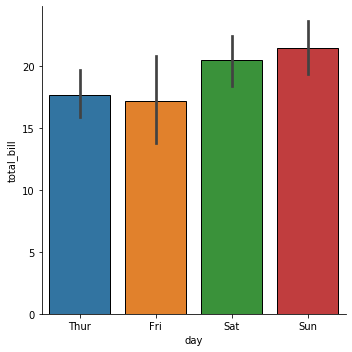

In [18]:
# Use more general factorplot method to create a plot
sns.factorplot(x = 'day', y = 'total_bill', data = tips, kind = 'bar')

# Matrix Plots

### Heat Maps


In [19]:
import seaborn as sns
%matplotlib inline

# Load data sets
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [20]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [21]:
# Tranform dataset into matrix form
tc = tips.corr() 
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


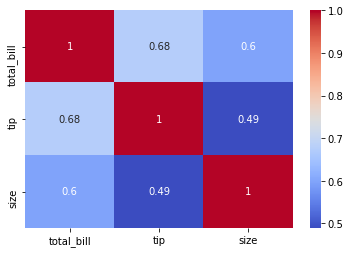

In [22]:
# Create heat map
sns.heatmap(tc, annot = True, cmap = 'coolwarm')

In [23]:
# View flights data
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [24]:
# Transform data to matrix form by converting a variable column into the index
fp =flights.pivot_table(index = 'month', columns = 'year', values = 'passengers')
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


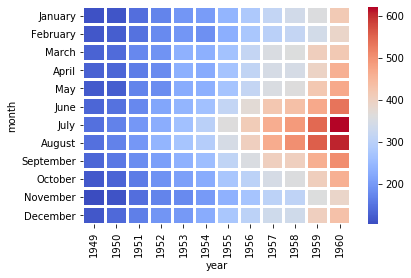

In [25]:
# Create heat map
sns.heatmap(fp, cmap = 'coolwarm', linecolor = 'white',linewidths = 2)

# Regression Plots

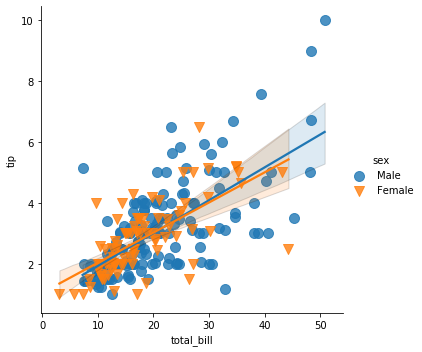

In [27]:
# Create linear model plot
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', markers = ['o','v'],
          scatter_kws = {'s':100})

C:\Users\admin\Anaconda3\envs\training\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


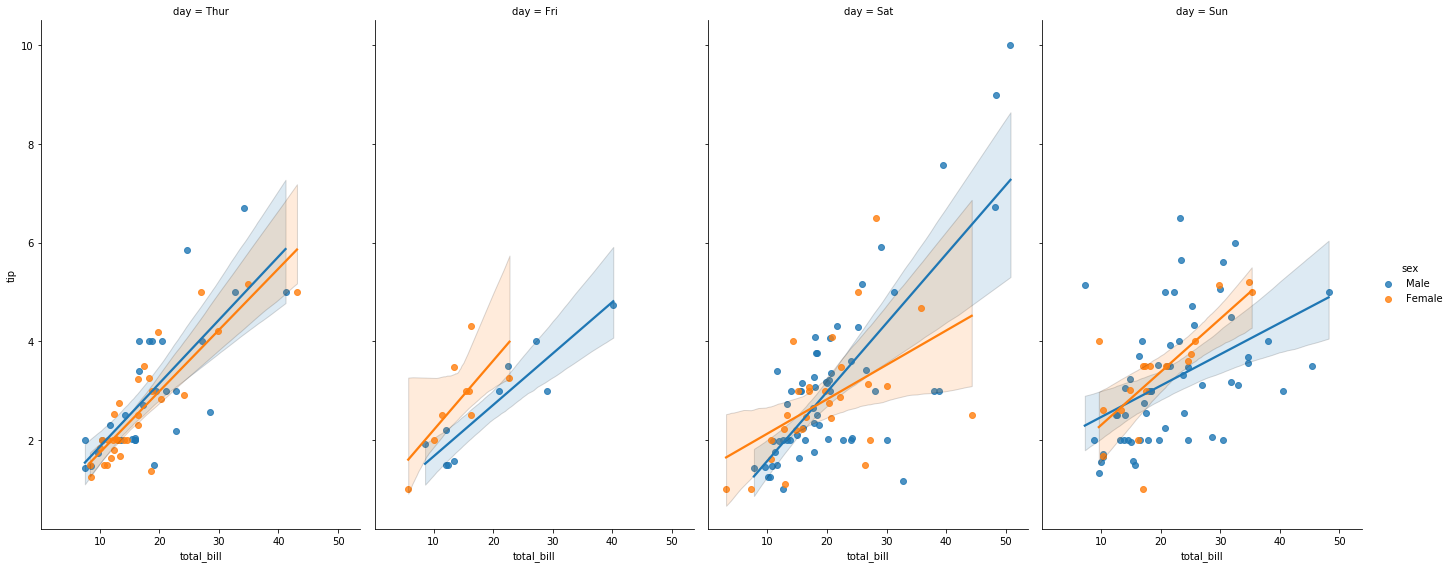

In [28]:
# Create faceted plot
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'day', hue = 'sex',
          aspect = 0.6, size = 8)

# Style and Color

In [36]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Style

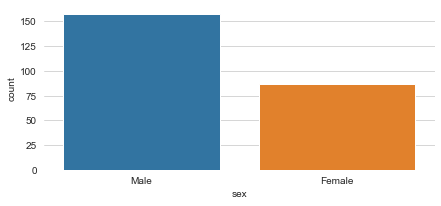

In [37]:
# Set style 
sns.set_style('whitegrid') # will remain until you change it
plt.figure(figsize = (7,3))
sns.countplot(x = 'sex', data = tips)

# Remove spines
sns.despine(left = True, bottom = True)

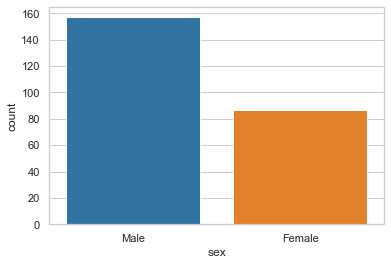

In [38]:
# Set context
sns.set_context('notebook',font_scale = 1) # default is notebook

# Plot
sns.countplot(x = 'sex', data = tips)

### Color

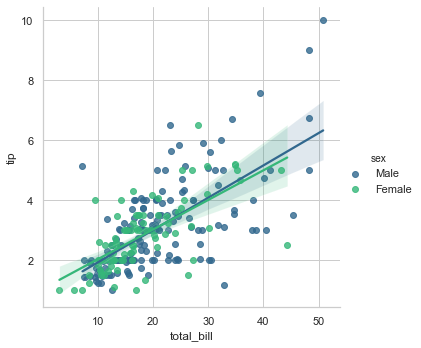

In [39]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', palette = 'viridis')